In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd

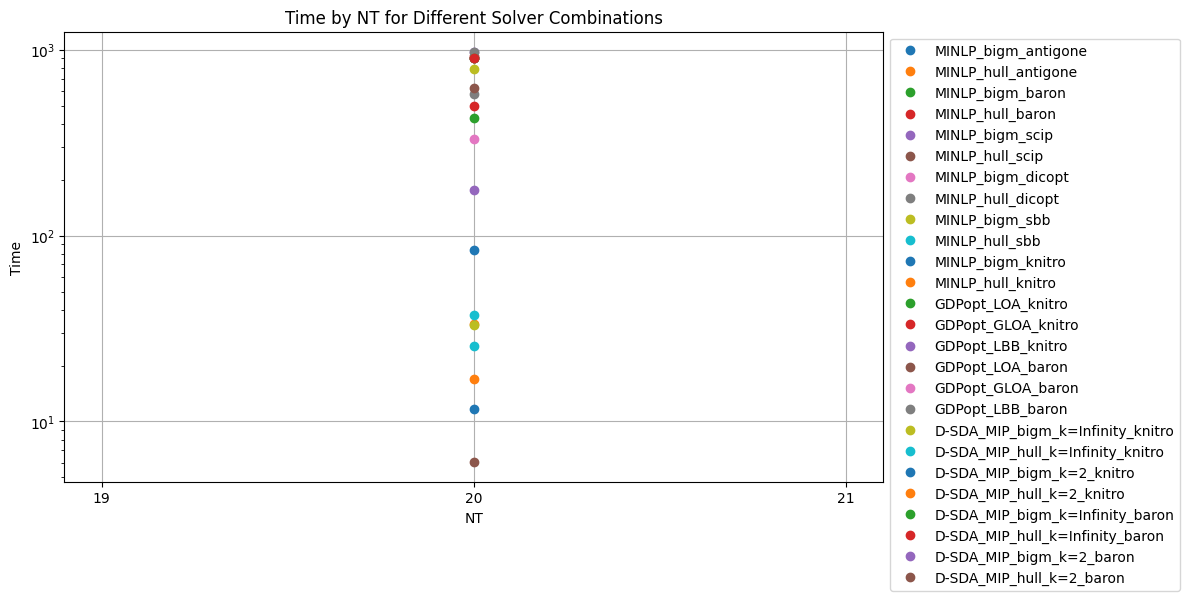

In [3]:
df = pd.read_csv('cstr_results_new.csv')

# Concatenate Method, Approach, and Solver columns
df['Method_Approach_Solver'] = df['Method'] + '_' + df['Approach'] + '_' + df['Solver']

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
all_combinations = pd.Series(df['Method_Approach_Solver'].unique())

# Use all combinations
combinations = all_combinations

# Filter only on one condition (those of MINLP)
# combinations = all_combinations[all_combinations.str.contains('D-SDA')]


# # Filter only on two conditions (those of MINLP and baron)
# combinations = all_combinations[all_combinations.str.contains(r'^(?=.*D-SDA)(?=.*Infinity)')]

for combination in combinations:
    subset = df[(df['Method_Approach_Solver'] == combination) & (df['Status'] != 'infeasible')]
    plt.plot(subset['NT'], subset['Time'], label=combination, marker='o', linestyle='None')

plt.xlabel('NT')
plt.yscale('log')
plt.ylabel('Time')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('Time by NT for Different Solver Combinations')
plt.grid(True)
plt.tight_layout()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()
